In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/RahinUlde/DataSets/refs/heads/main/Glass.csv')
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [55]:
#EDA to understand structure 
#missing value, outliers
#visualization (histogram, boxplot, pairplot)
#correlation 
#handling missing value
#encoding
#feature scaling
#split data train test split
#random forest implementation and evaluation (accuracy, precision, recall, and F1-score.)
#bagging and boosting (and compare them)

In [56]:
df = df.rename(columns={'RI': 'refractive_index', 'Na': 'sodium', 'Mg': 'magnesium', 'Al': 'aluminum', 'Si': 'silicon', 'K': 'potassium', 
                   'Ca': 'calcium', 'Ba': 'barium', 'Fe': 'iron'})

In [57]:
df.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
Type                0
dtype: int64

In [58]:
df.describe()

refractive_index      sodium   magnesium    aluminum     silicon  \
count        214.000000  214.000000  214.000000  214.000000  214.000000   
mean           1.518365   13.407850    2.684533    1.444907   72.650935   
std            0.003037    0.816604    1.442408    0.499270    0.774546   
min            1.511150   10.730000    0.000000    0.290000   69.810000   
25%            1.516522   12.907500    2.115000    1.190000   72.280000   
50%            1.517680   13.300000    3.480000    1.360000   72.790000   
75%            1.519157   13.825000    3.600000    1.630000   73.087500   
max            1.533930   17.380000    4.490000    3.500000   75.410000   

        potassium     calcium      barium        iron        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739  
min      0.000000    5.430000    0.000000    0.000000    1.000000  
25%      0.122500    8.240000    0.000000    0.000000    1.000000  
50%      0.555000    8.600000    0.000000    0.000000    2.000000  
75%      0.610000    9.172500    0.000000    0.100000    3.000000  
max      6.210000   16.190000    3.150000    0.510000    7.000000

In [59]:
df.corr()

refractive_index    sodium  magnesium  aluminum   silicon  \
refractive_index          1.000000 -0.191885  -0.122274 -0.407326 -0.542052   
sodium                   -0.191885  1.000000  -0.273732  0.156794 -0.069809   
magnesium                -0.122274 -0.273732   1.000000 -0.481799 -0.165927   
aluminum                 -0.407326  0.156794  -0.481799  1.000000 -0.005524   
silicon                  -0.542052 -0.069809  -0.165927 -0.005524  1.000000   
potassium                -0.289833 -0.266087   0.005396  0.325958 -0.193331   
calcium                   0.810403 -0.275442  -0.443750 -0.259592 -0.208732   
barium                   -0.000386  0.326603  -0.492262  0.479404 -0.102151   
iron                      0.143010 -0.241346   0.083060 -0.074402 -0.094201   
Type                     -0.164237  0.502898  -0.744993  0.598829  0.151565   

                  potassium   calcium    barium      iron      Type  
refractive_index  -0.289833  0.810403 -0.000386  0.143010 -0.164237  
sodium            -0.266087 -0.275442  0.326603 -0.241346  0.502898  
magnesium          0.005396 -0.443750 -0.492262  0.083060 -0.744993  
aluminum           0.325958 -0.259592  0.479404 -0.074402  0.598829  
silicon           -0.193331 -0.208732 -0.102151 -0.094201  0.151565  
potassium          1.000000 -0.317836 -0.042618 -0.007719 -0.010054  
calcium           -0.317836  1.000000 -0.112841  0.124968  0.000952  
barium            -0.042618 -0.112841  1.000000 -0.058692  0.575161  
iron              -0.007719  0.124968 -0.058692  1.000000 -0.188278  
Type              -0.010054  0.000952  0.575161 -0.188278  1.000000

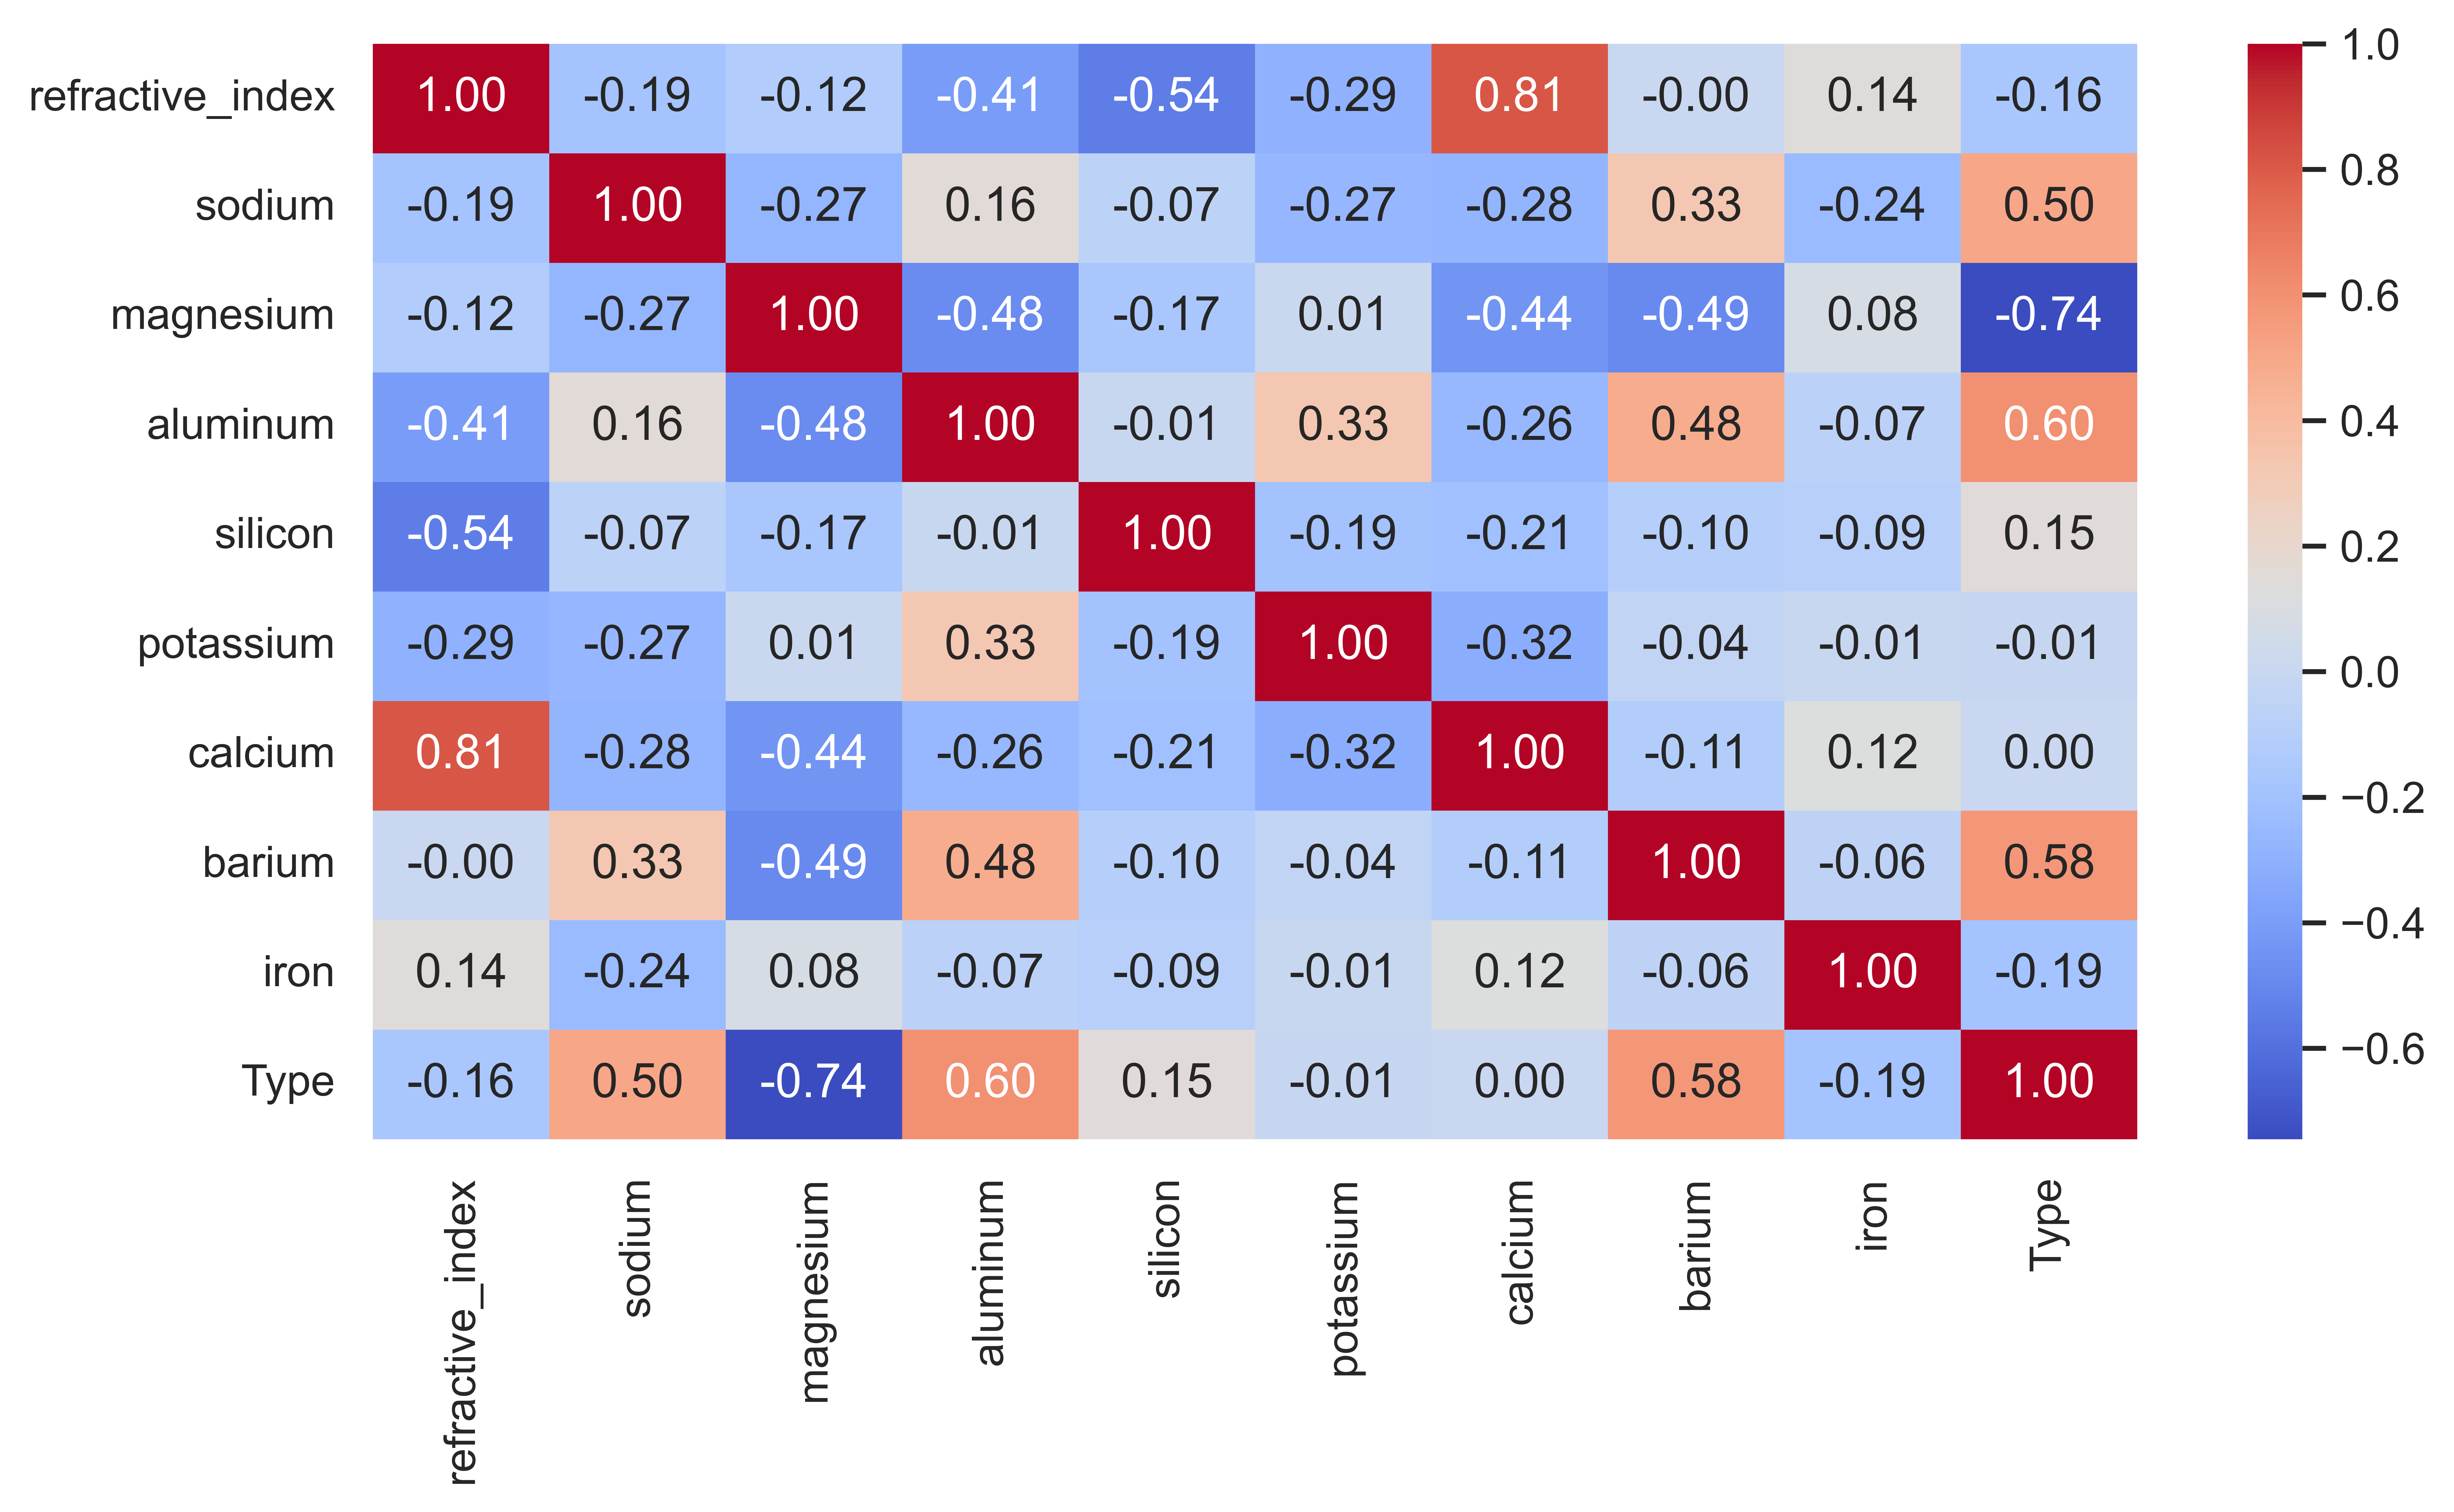

In [60]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

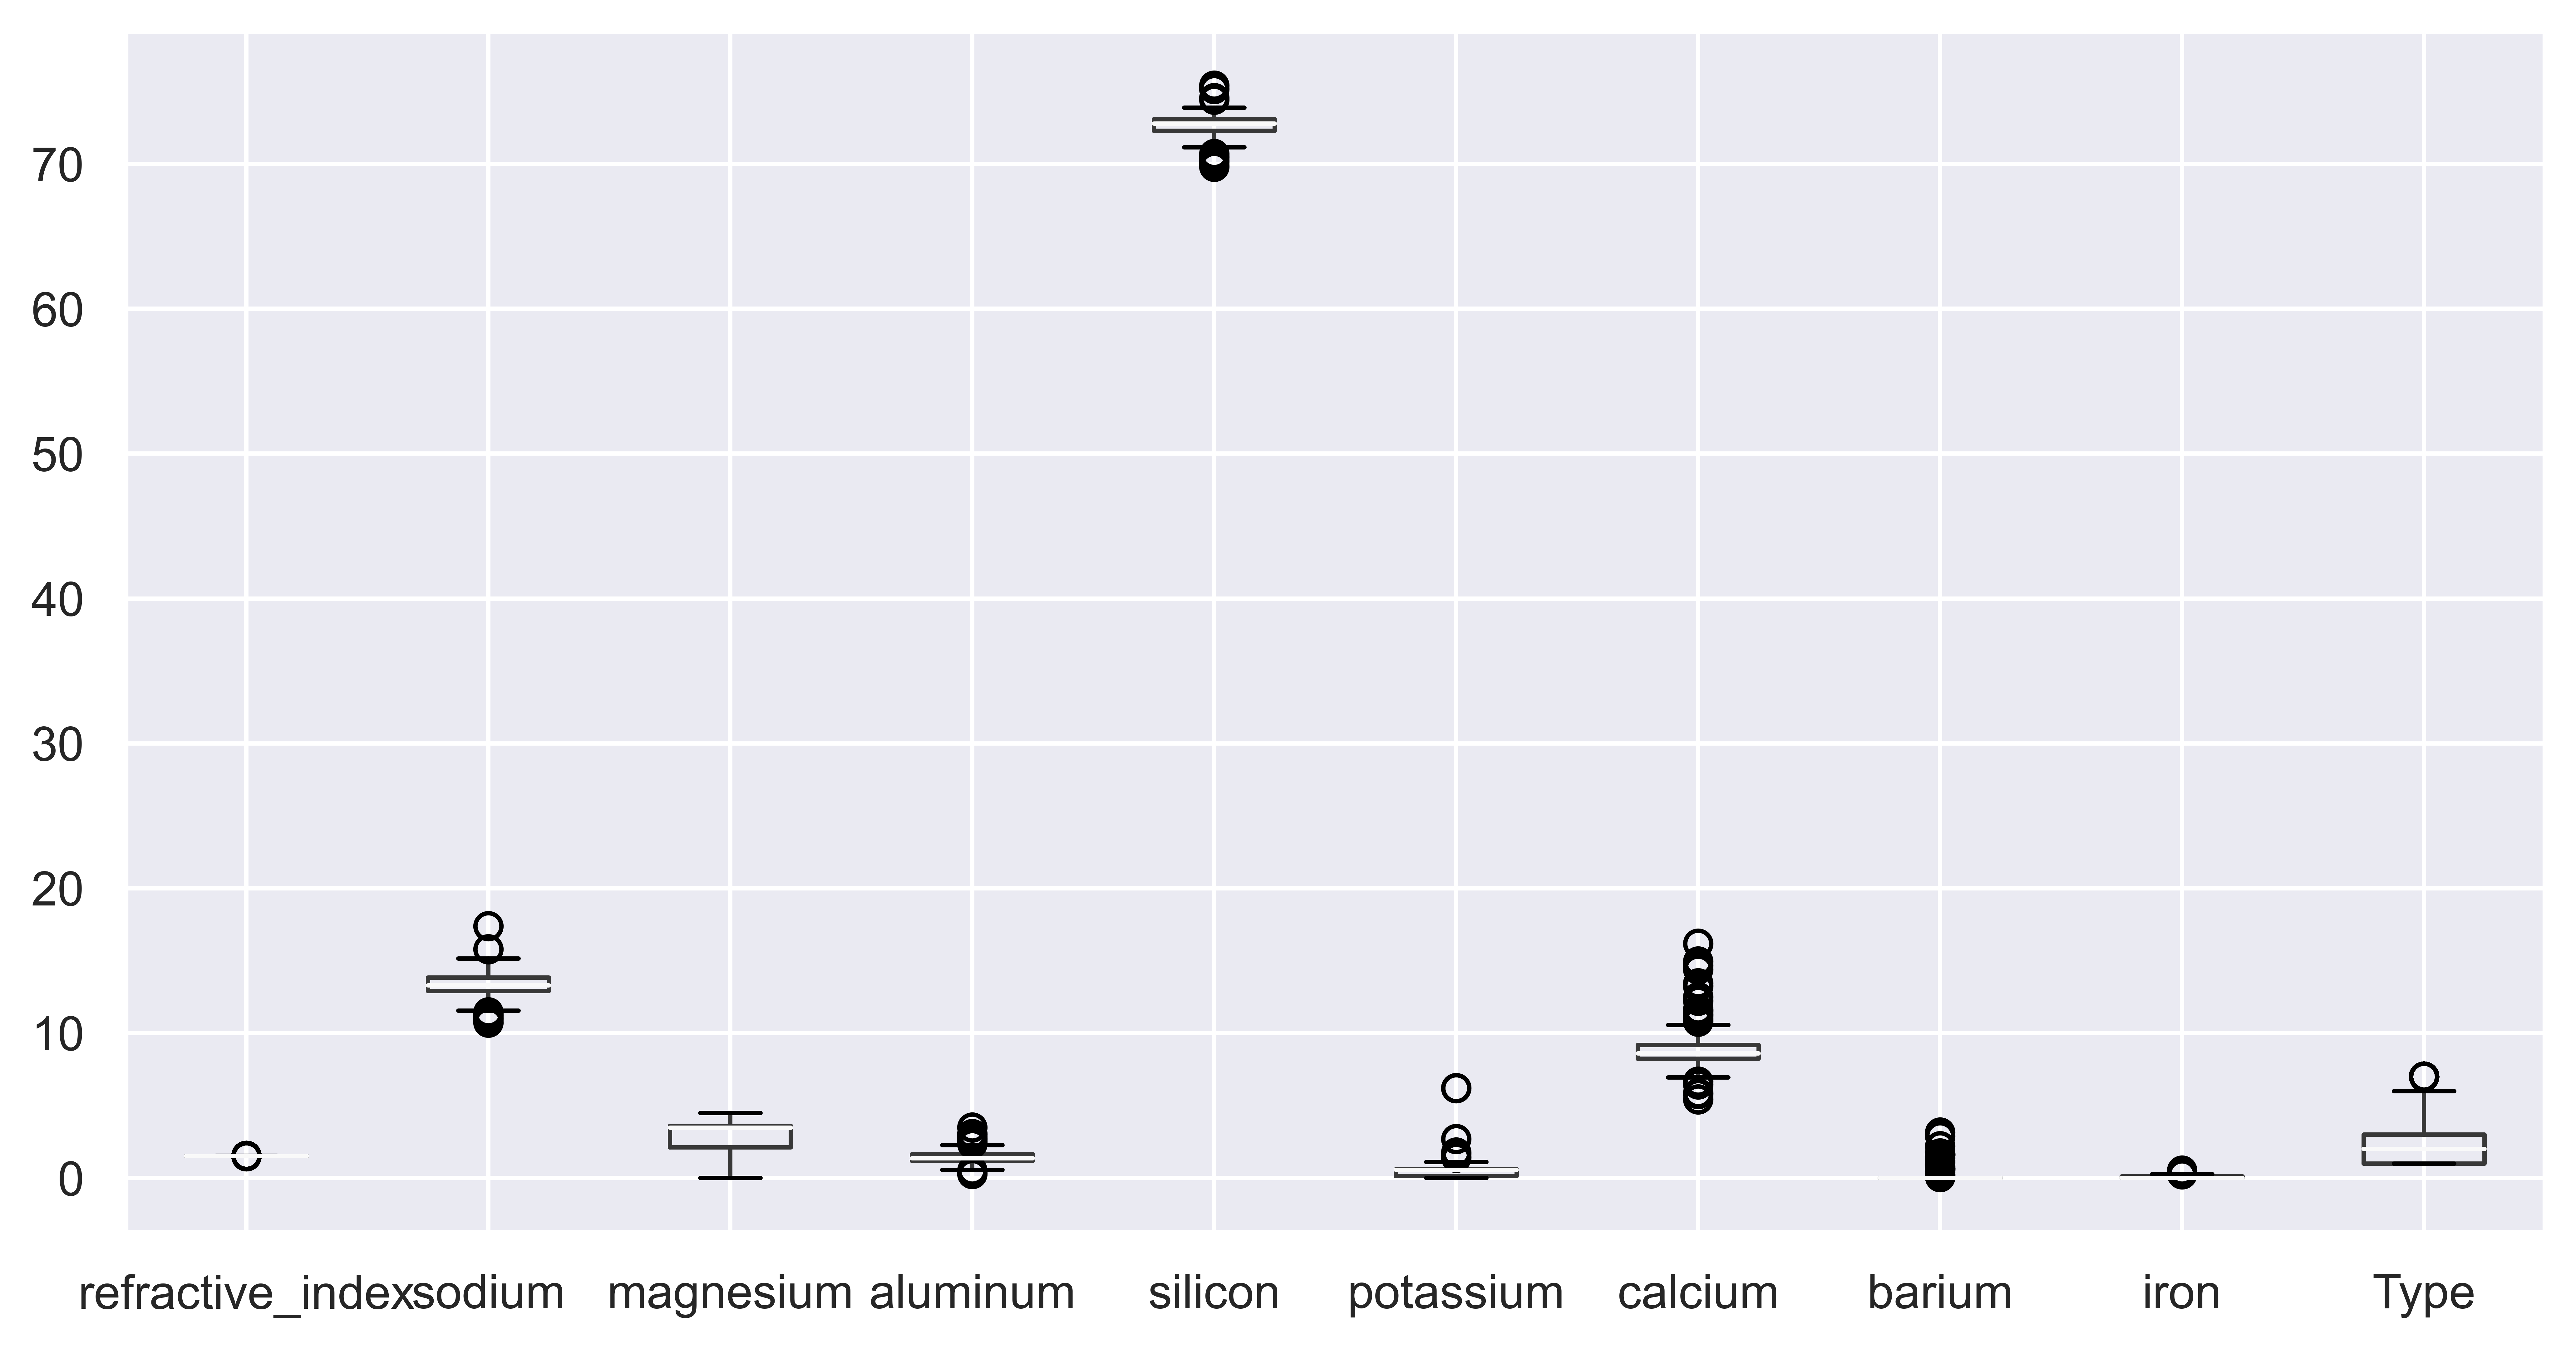

In [61]:
df.boxplot()
plt.show()

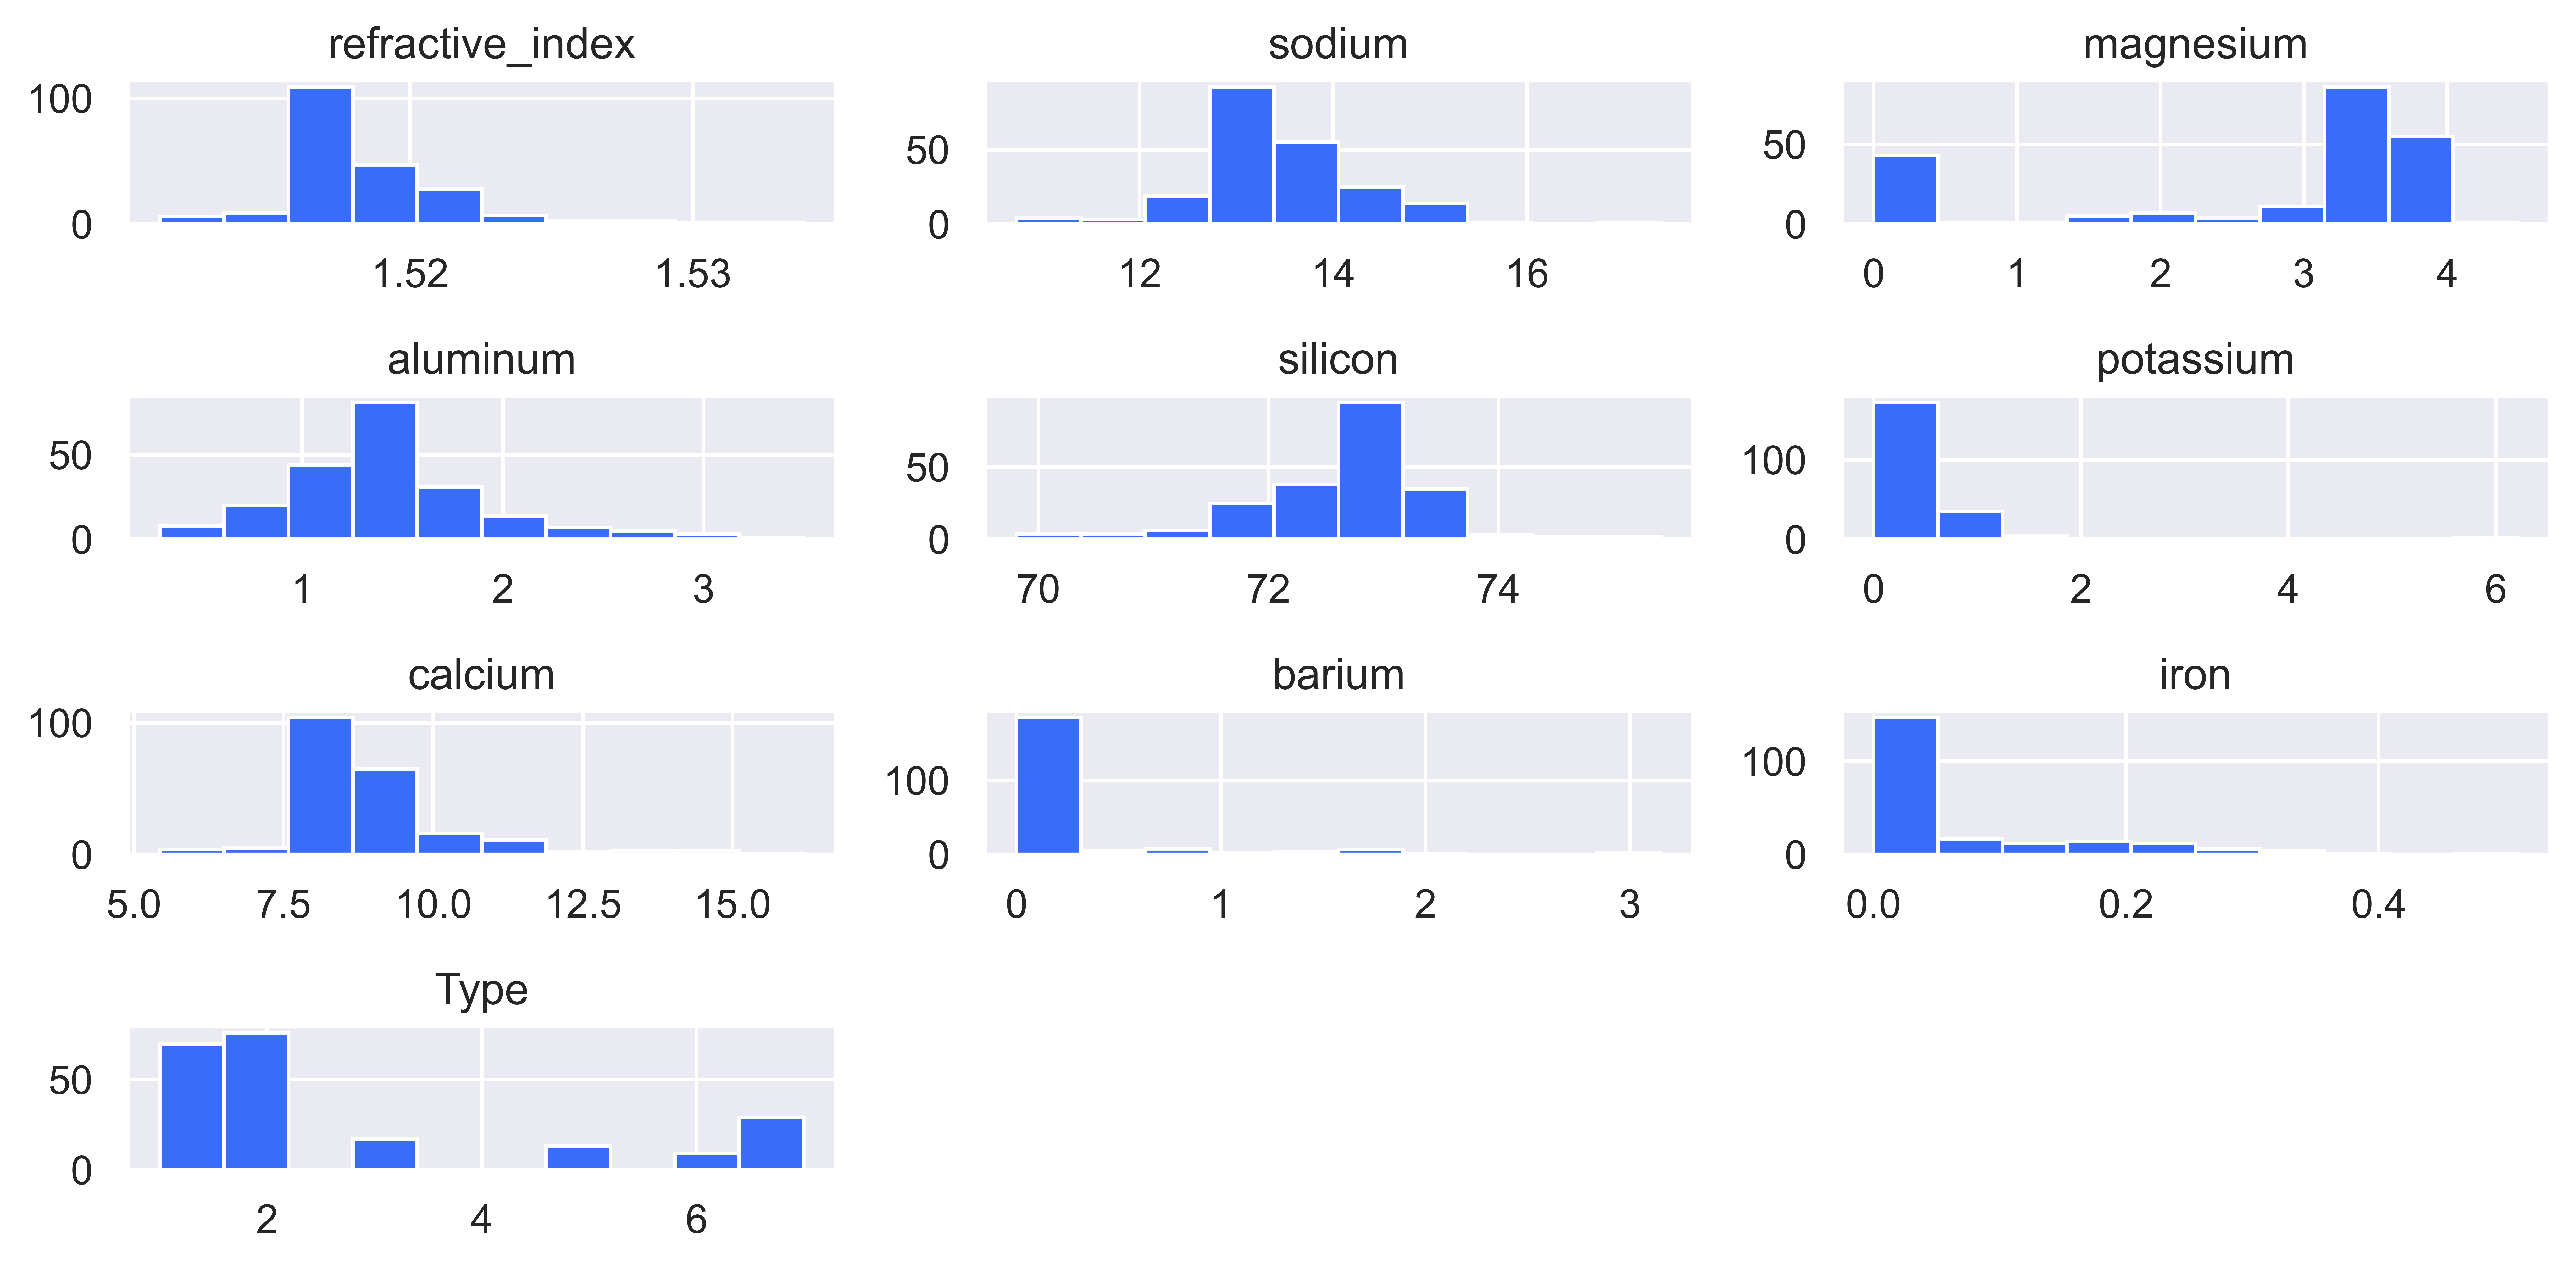

In [62]:
df.hist()
plt.tight_layout()
plt.show()

In [64]:
df.head()

refractive_index  sodium  magnesium  aluminum  silicon  potassium  calcium  \
0           1.52101   13.64       4.49      1.10    71.78       0.06     8.75   
1           1.51761   13.89       3.60      1.36    72.73       0.48     7.83   
2           1.51618   13.53       3.55      1.54    72.99       0.39     7.78   
3           1.51766   13.21       3.69      1.29    72.61       0.57     8.22   
4           1.51742   13.27       3.62      1.24    73.08       0.55     8.07   

   barium  iron  Type  
0     0.0   0.0     1  
1     0.0   0.0     1  
2     0.0   0.0     1  
3     0.0   0.0     1  
4     0.0   0.0     1

In [65]:
#Outlier detection function
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)   
    return lower,upper

In [66]:
outlier_detection(df, 'sodium')

(11.531250000000004, 15.201249999999998)

In [67]:
outlier_detection(df, 'aluminum')

(0.53, 2.29)

In [68]:
outlier_detection(df, 'silicon')

(71.06875, 74.29875000000001)

In [69]:
outlier_detection(df, 'calcium')

(6.841250000000001, 10.57125)

In [70]:
df[df['calcium'] > 10.57125]

refractive_index  sodium  magnesium  aluminum  silicon  potassium  \
103           1.52725   13.80       3.15      0.66    70.57       0.08   
104           1.52410   13.83       2.90      1.17    71.15       0.08   
105           1.52475   11.45       0.00      1.88    72.19       0.81   
106           1.53125   10.73       0.00      2.10    69.81       0.58   
107           1.53393   12.30       0.00      1.00    70.16       0.12   
108           1.52222   14.43       0.00      1.00    72.67       0.10   
109           1.51818   13.72       0.00      0.56    74.45       0.00   
110           1.52664   11.23       0.00      0.77    73.21       0.00   
111           1.52739   11.02       0.00      0.75    73.08       0.00   
112           1.52777   12.64       0.00      0.67    72.02       0.06   
130           1.52177   13.75       1.01      1.36    72.19       0.33   
131           1.52614   13.70       0.00      1.36    71.24       0.19   
165           1.52171   11.56       1.88      1.56    72.86       0.47   
166           1.52151   11.03       1.71      1.56    73.44       0.58   
167           1.51969   12.64       0.00      1.65    73.75       0.38   
169           1.51994   13.27       0.00      1.76    73.03       0.47   
170           1.52369   13.44       0.00      1.58    72.22       0.32   
173           1.52043   13.38       0.00      1.40    72.25       0.33   
175           1.52119   12.97       0.33      1.51    73.39       0.13   
182           1.51916   14.15       0.00      2.09    72.74       0.00   
183           1.51969   14.56       0.00      0.56    73.48       0.00   

     calcium  barium  iron  Type  
103    11.64    0.00  0.00     2  
104    10.79    0.00  0.00     2  
105    13.24    0.00  0.34     2  
106    13.30    3.15  0.28     2  
107    16.19    0.00  0.24     2  
108    11.52    0.00  0.08     2  
109    10.99    0.00  0.00     2  
110    14.68    0.00  0.00     2  
111    14.96    0.00  0.00     2  
112    14.40    0.00  0.00     2  
130    11.14    0.00  0.00     2  
131    13.44    0.00  0.10     2  
165    11.41    0.00  0.00     5  
166    11.62    0.00  0.00     5  
167    11.53    0.00  0.00     5  
169    11.32    0.00  0.00     5  
170    12.24    0.00  0.00     5  
173    12.50    0.00  0.00     5  
175    11.27    0.00  0.28     5  
182    10.88    0.00  0.00     6  
183    11.22    0.00  0.00     6

In [72]:
#Capping Outliers
df.loc[df['calcium'] > 10.57125,'calcium'] = 10.57125

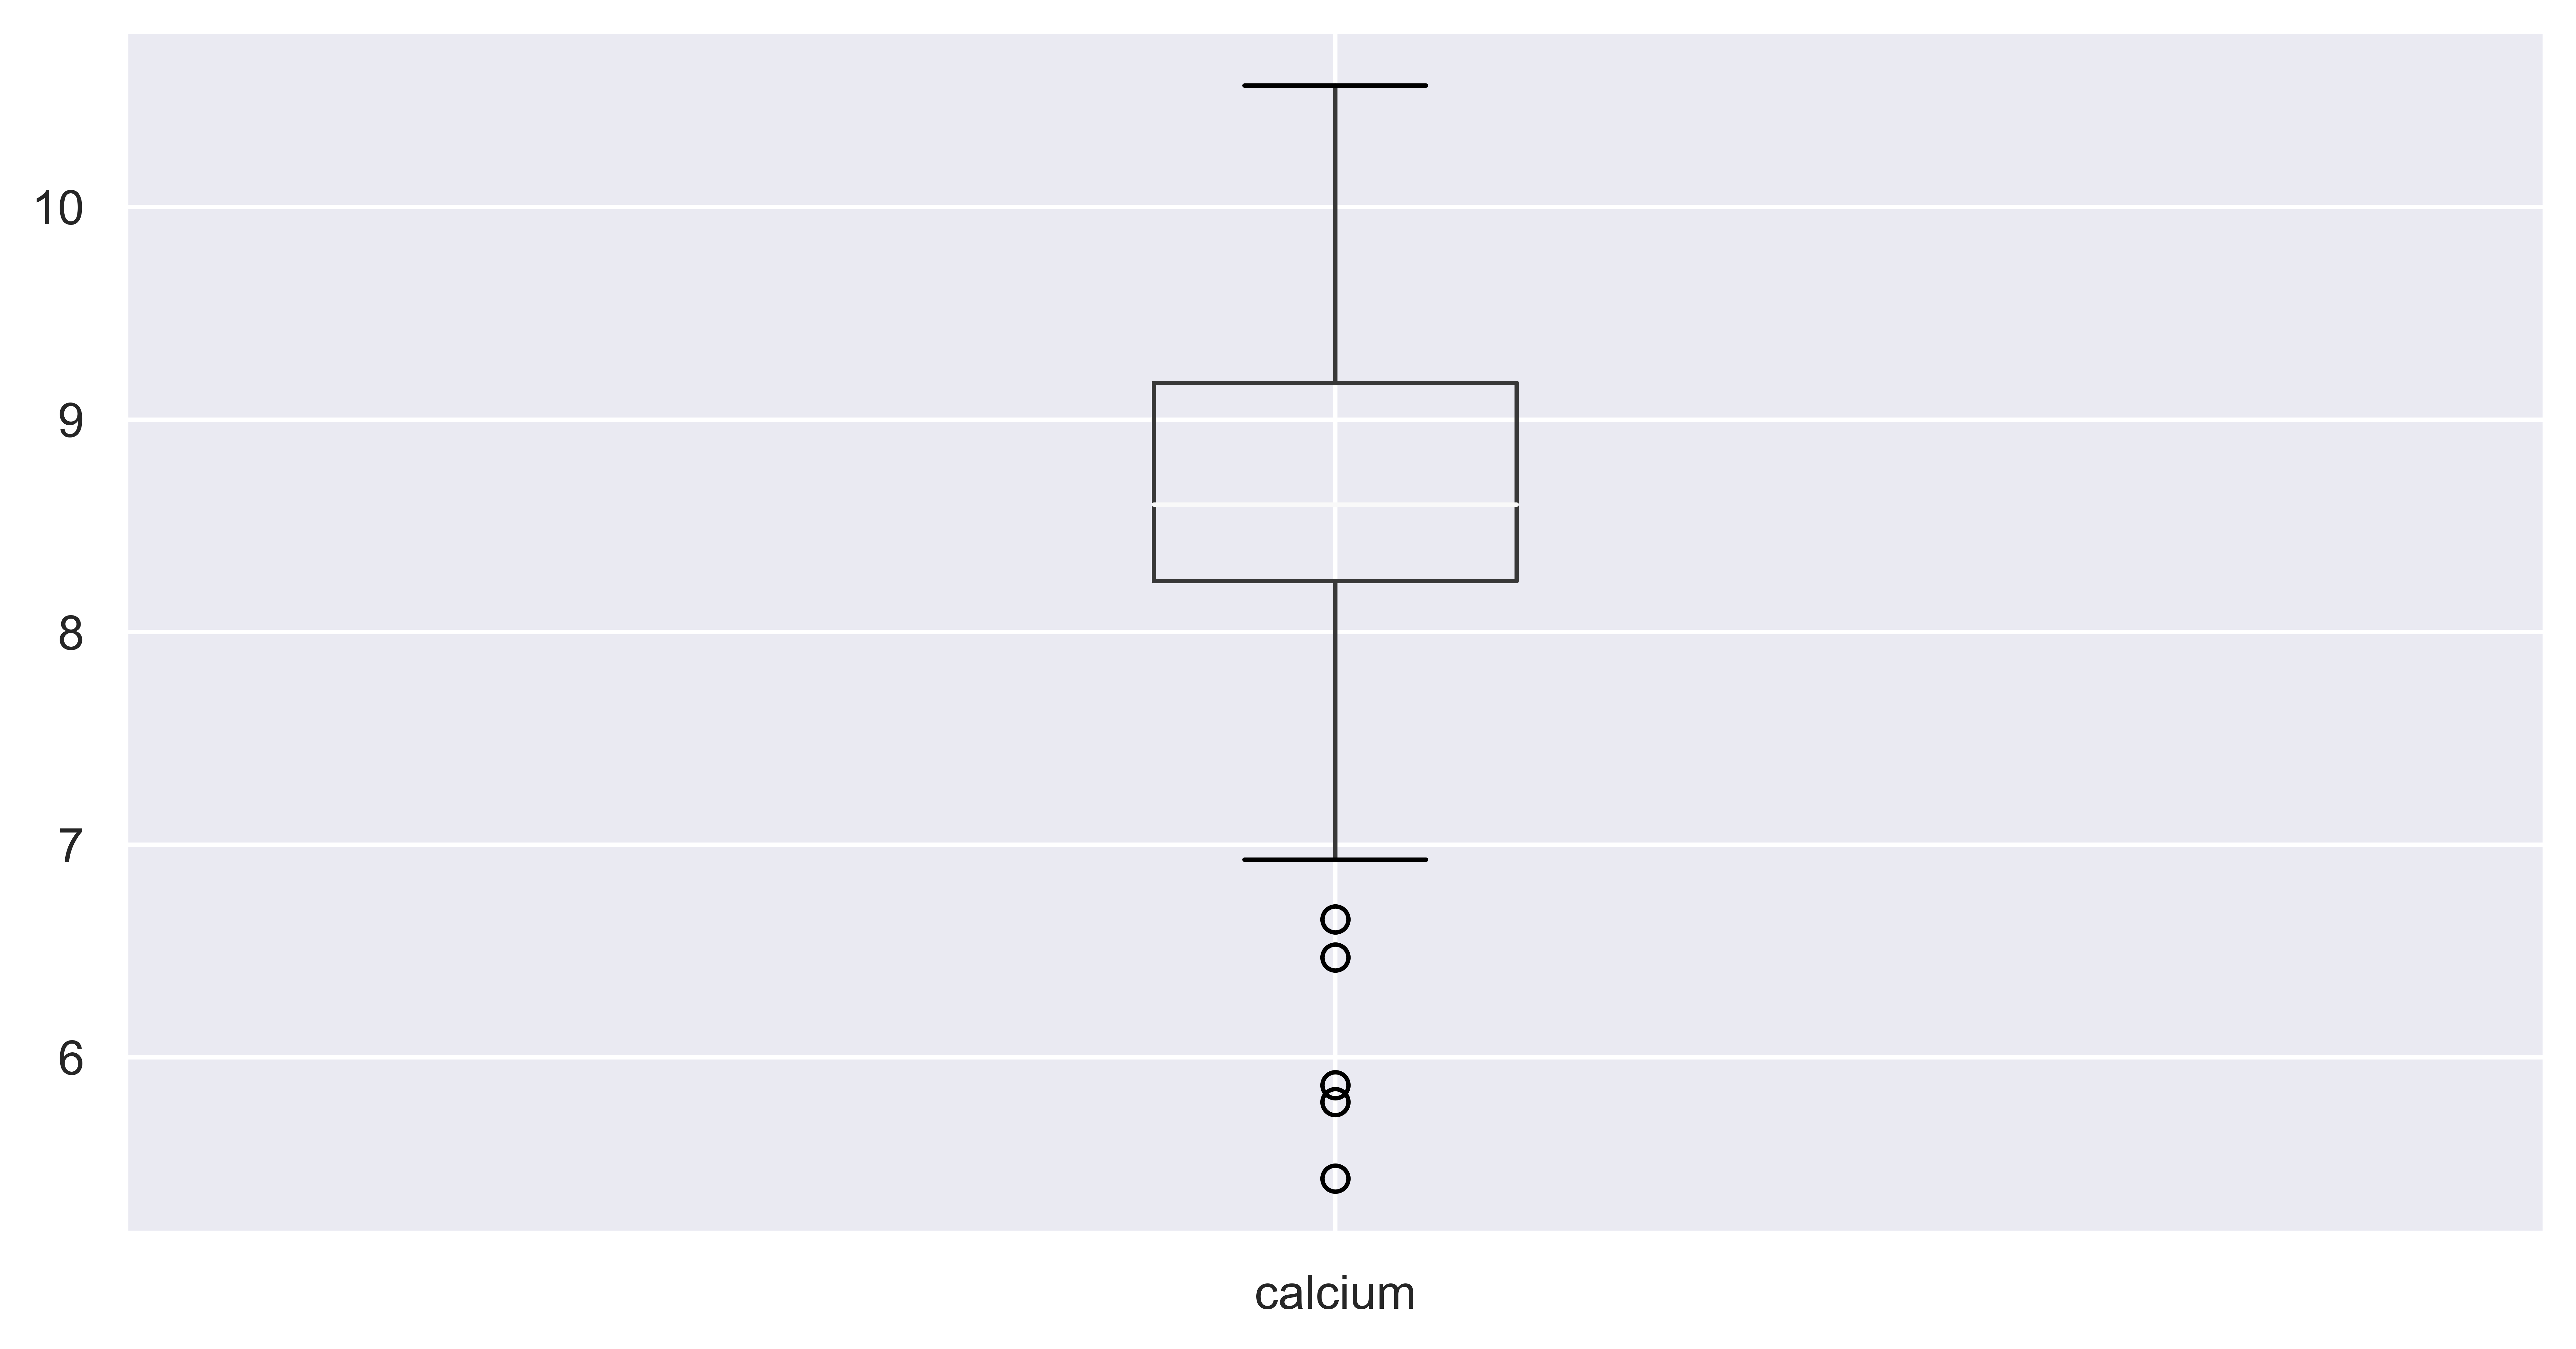

In [73]:
df.boxplot('calcium')
plt.show()

In [75]:
print(df['barium'].value_counts())
print(df['iron'].value_counts())

0.00    176
0.64      2
1.57      2
0.09      2
1.59      2
0.11      2
3.15      1
0.81      1
1.64      1
1.06      1
0.54      1
2.88      1
1.38      1
1.55      1
0.67      1
1.71      1
0.56      1
0.63      1
0.53      1
0.66      1
0.61      1
0.27      1
0.69      1
0.40      1
0.14      1
0.76      1
1.68      1
1.63      1
1.19      1
0.24      1
2.20      1
0.15      1
0.06      1
1.67      1
Name: barium, dtype: int64
0.00    144
0.24      7
0.17      7
0.09      6
0.10      5
0.11      4
0.16      3
0.28      3
0.12      3
0.22      3
0.14      3
0.07      3
0.19      2
0.15      2
0.08      2
0.06      1
0.21      1
0.05      1
0.51      1
0.37      1
0.35      1
0.25      1
0.18      1
0.34      1
0.29      1
0.30      1
0.20      1
0.32      1
0.26      1
0.03      1
0.31      1
0.01      1
Name: iron, dtype: int64


Since a large number of rows contain 0.00, it’s a strong sign that these features might be better represented as “present” or “not present” indicators

In [79]:
# Create binary indicator columns
df['has_barium'] = (df['barium'] > 0).astype(int)
df['has_iron'] = (df['iron'] > 0).astype(int)

# Drop the original sparse numeric columns
df.drop(['barium', 'iron'], axis=1, inplace=True)

In [80]:
df

refractive_index  sodium  magnesium  aluminum  silicon  potassium  \
0             1.52101   13.64       4.49      1.10    71.78       0.06   
1             1.51761   13.89       3.60      1.36    72.73       0.48   
2             1.51618   13.53       3.55      1.54    72.99       0.39   
3             1.51766   13.21       3.69      1.29    72.61       0.57   
4             1.51742   13.27       3.62      1.24    73.08       0.55   
..                ...     ...        ...       ...      ...        ...   
209           1.51623   14.14       0.00      2.88    72.61       0.08   
210           1.51685   14.92       0.00      1.99    73.06       0.00   
211           1.52065   14.36       0.00      2.02    73.42       0.00   
212           1.51651   14.38       0.00      1.94    73.61       0.00   
213           1.51711   14.23       0.00      2.08    73.36       0.00   

     calcium  Type  has_barium  has_iron  
0       8.75     1           0         0  
1       7.83     1           0         0  
2       7.78     1           0         0  
3       8.22     1           0         0  
4       8.07     1           0         0  
..       ...   ...         ...       ...  
209     9.18     7           1         0  
210     8.40     7           1         0  
211     8.44     7           1         0  
212     8.48     7           1         0  
213     8.62     7           1         0  

[214 rows x 10 columns]

In [82]:
print(df['has_barium'].value_counts())
print(df['has_iron'].value_counts())

0    176
1     38
Name: has_barium, dtype: int64
0    144
1     70
Name: has_iron, dtype: int64


In [83]:
X = df.drop('Type', axis=1)
y = df['Type']

In [85]:
X

refractive_index  sodium  magnesium  aluminum  silicon  potassium  \
0             1.52101   13.64       4.49      1.10    71.78       0.06   
1             1.51761   13.89       3.60      1.36    72.73       0.48   
2             1.51618   13.53       3.55      1.54    72.99       0.39   
3             1.51766   13.21       3.69      1.29    72.61       0.57   
4             1.51742   13.27       3.62      1.24    73.08       0.55   
..                ...     ...        ...       ...      ...        ...   
209           1.51623   14.14       0.00      2.88    72.61       0.08   
210           1.51685   14.92       0.00      1.99    73.06       0.00   
211           1.52065   14.36       0.00      2.02    73.42       0.00   
212           1.51651   14.38       0.00      1.94    73.61       0.00   
213           1.51711   14.23       0.00      2.08    73.36       0.00   

     calcium  has_barium  has_iron  
0       8.75           0         0  
1       7.83           0         0  
2       7.78           0         0  
3       8.22           0         0  
4       8.07           0         0  
..       ...         ...       ...  
209     9.18           1         0  
210     8.40           1         0  
211     8.44           1         0  
212     8.48           1         0  
213     8.62           1         0  

[214 rows x 9 columns]

In [86]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [87]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#import seaborn as sns
#import matplotlib.pyplot as plt

# Random Forest

In [88]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [89]:
# Predict on test data
y_pred = model.predict(X_test)

In [92]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7209302325581395


In [99]:
print(model.feature_importances_)
print(X.columns)

[0.1393424  0.13265006 0.18980221 0.16628156 0.09455524 0.09306831
 0.13768534 0.0335782  0.01303668]
Index(['refractive_index', 'sodium', 'magnesium', 'aluminum', 'silicon',
       'potassium', 'calcium', 'has_barium', 'has_iron'],
      dtype='object')


In [100]:
print('Training accuracy: ', model.score(X_train,y_train))
print('Testing Accuracy: ', model.score(X_test,y_test))

Training accuracy:  1.0
Testing Accuracy:  0.7209302325581395


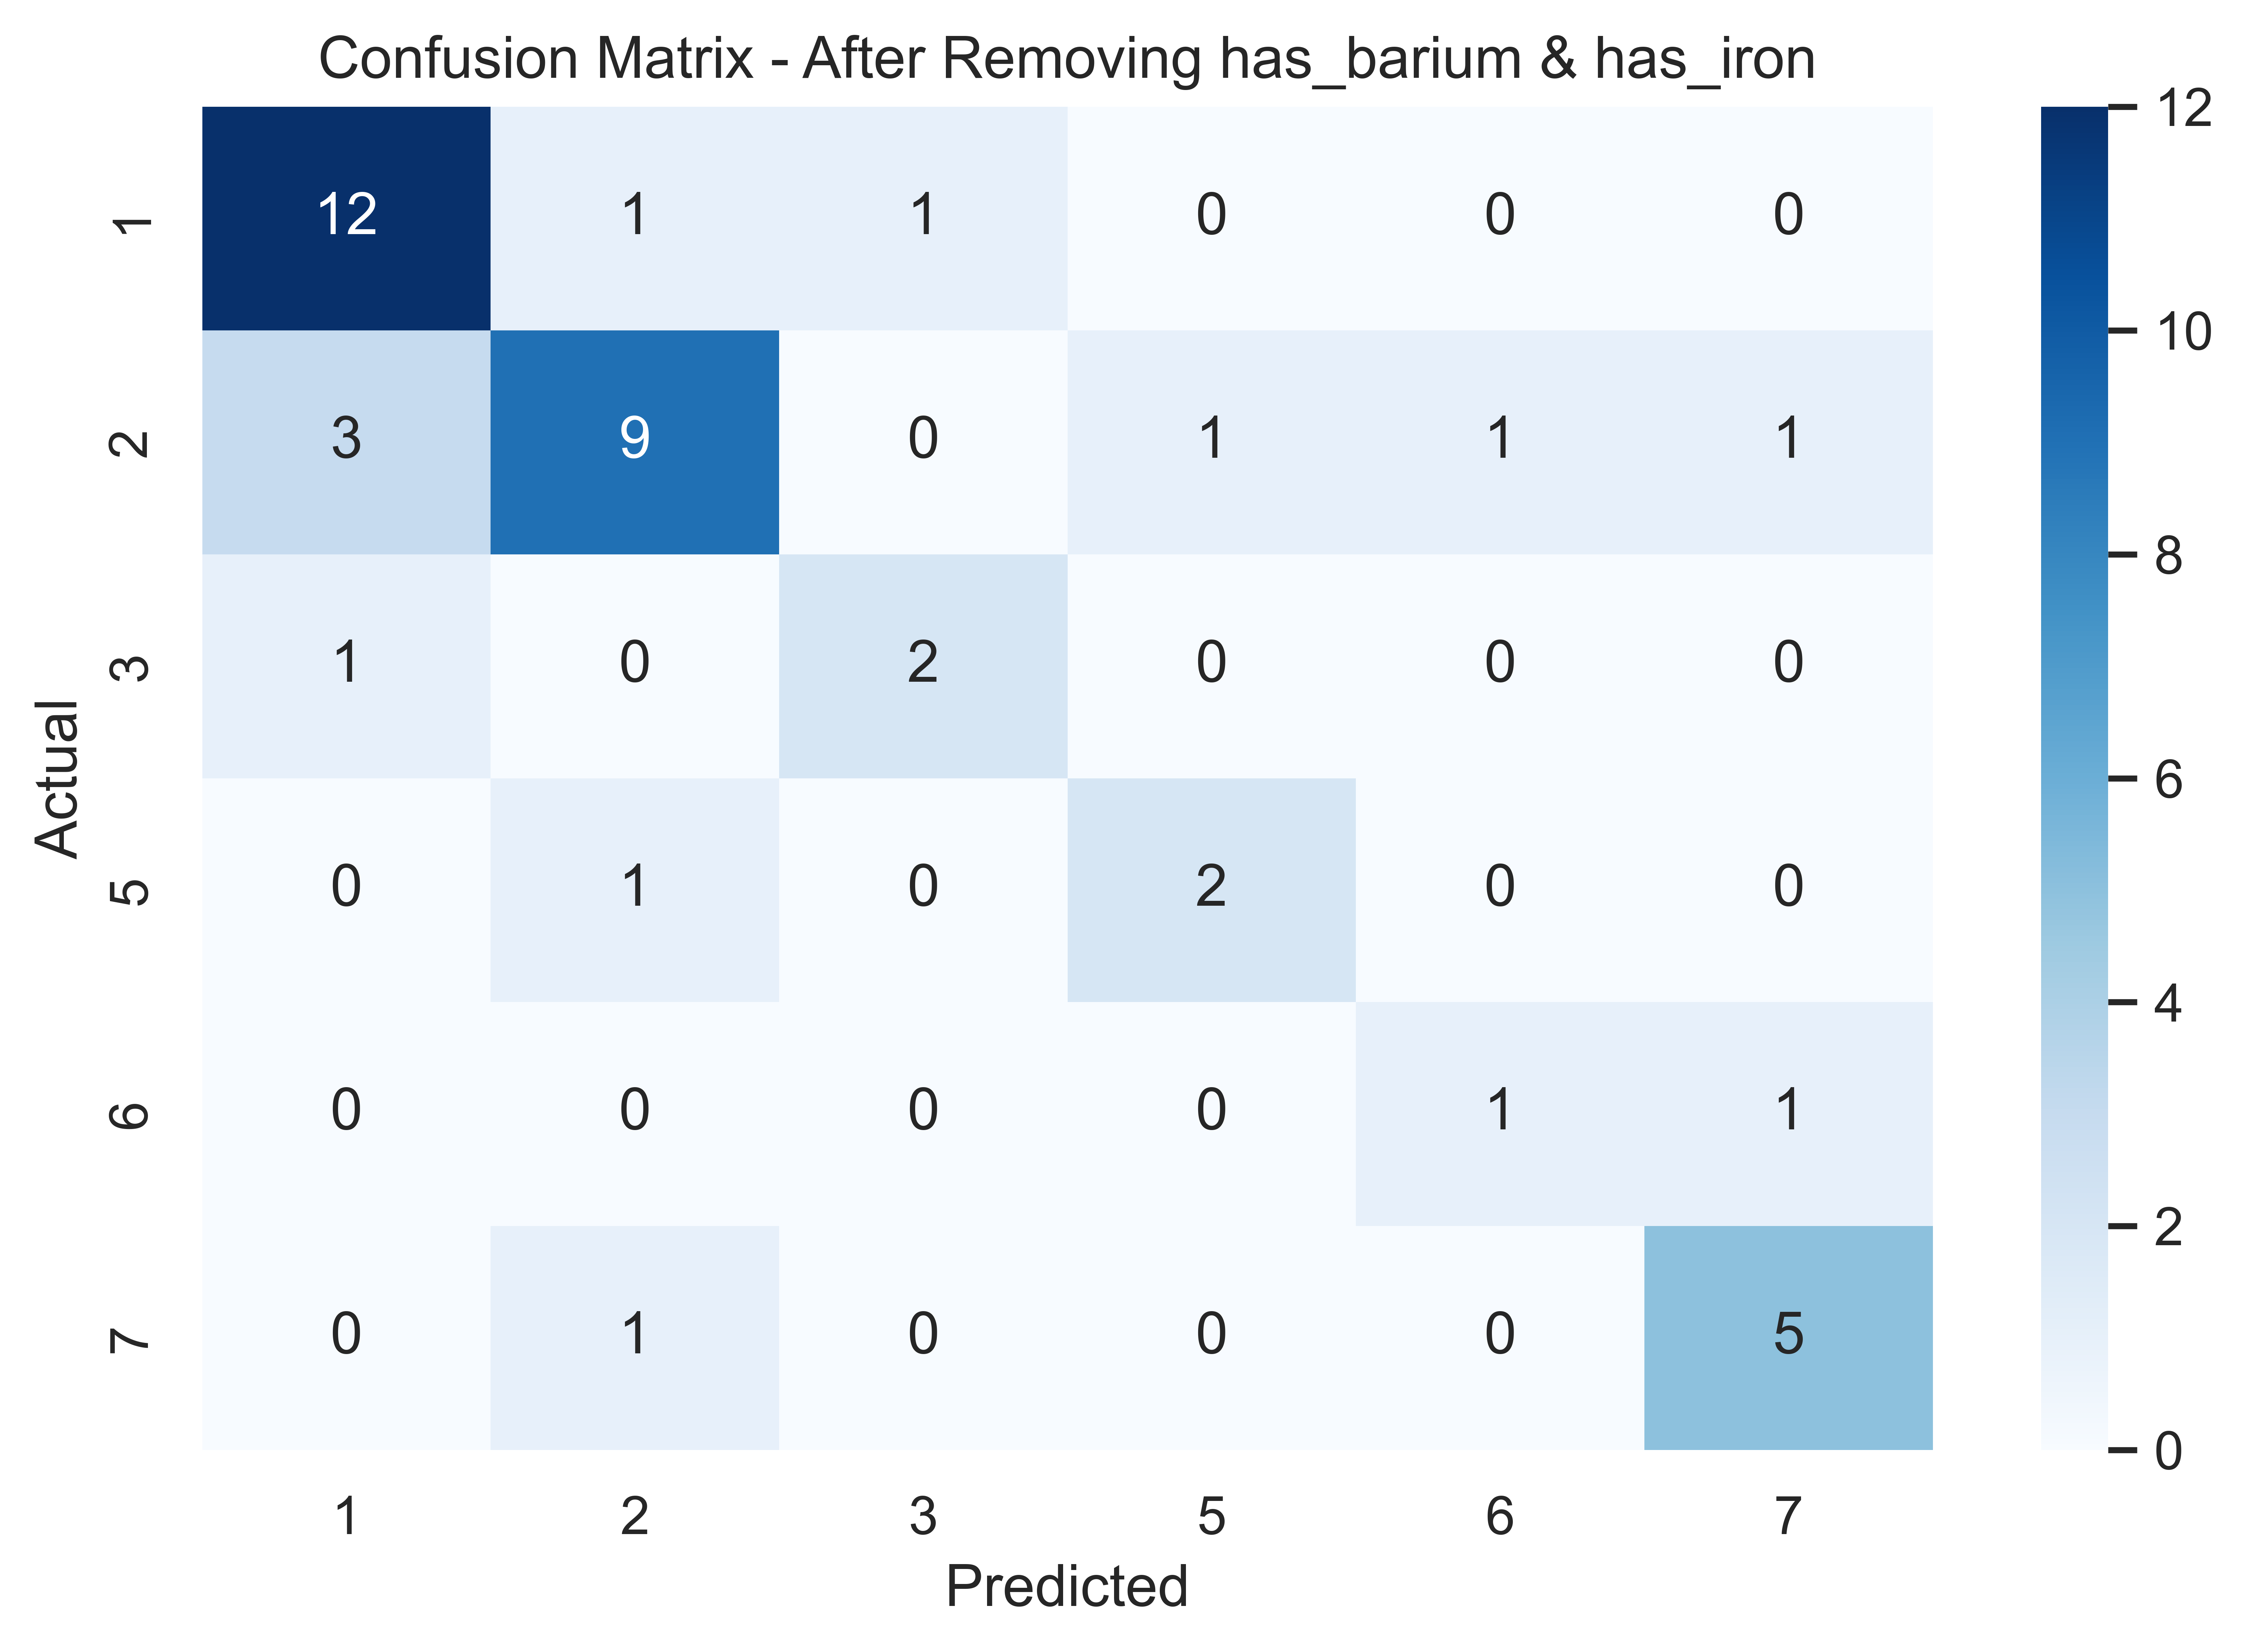

In [159]:
# Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix - After Removing has_barium & has_iron")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [101]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Importance Score")
plt.title("Feature Importances in Decision Tree")
plt.tight_layout()
plt.show()

# Trying model building usinf K fold cross validation

In [103]:
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut,cross_val_score

In [121]:
kf = KFold(n_splits=5)

scores = cross_val_score(model, X, y, cv = 5)

In [122]:
scores

array([0.69767442, 0.65116279, 0.65116279, 0.53488372, 0.76190476])

In [123]:
scores.mean()

0.6593576965669989

# Tuning hyperparameter

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
# Define parameter grid
param = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [132]:
# base model
rf = RandomForestClassifier(random_state=42)

In [133]:
grid_search = GridSearchCV(estimator = rf, param_grid = param, cv=5, n_jobs = -1, verbose = 1, scoring = 'accuracy')

In [134]:
# Fit to training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [135]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [136]:
# best model
model2 = grid_search.best_estimator_

In [137]:
# Predict
y_pred2 = model2.predict(X_test)

In [138]:
y_pred2

array([7, 5, 2, 5, 1, 2, 2, 5, 1, 1, 3, 1, 7, 6, 1, 7, 7, 1, 1, 2, 2, 1,
       7, 2, 1, 3, 2, 6, 2, 1, 2, 1, 1, 7, 2, 2, 1, 1, 2, 3, 1, 2, 6],
      dtype=int64)

In [ ]:
# Evaluate
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#import seaborn as sns
#import matplotlib.pyplot as plt

In [139]:
print("Test Accuracy after tuning:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

Test Accuracy after tuning: 0.7209302325581395
Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.69      0.60      0.64        15
           3       0.67      0.67      0.67         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.83      0.83      0.83         6

    accuracy                           0.72        43
   macro avg       0.71      0.76      0.73        43
weighted avg       0.72      0.72      0.72        43



In [142]:
print('Training accuracy: ', model2.score(X_train,y_train))
print('Testing Accuracy: ', model2.score(X_test,y_test))

Training accuracy:  1.0
Testing Accuracy:  0.7209302325581395


In [150]:
def prediction(model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(f"Train Accuracy: {model.score(X_train,y_train)}")
    print(f"Test Accuracy: {model.score(X_test,y_test)}")
    print(classification_report(y_test,y_pred))

In [151]:
prediction(RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 150))

Train Accuracy: 1.0
Test Accuracy: 0.7441860465116279
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.75      0.60      0.67        15
           3       0.67      0.67      0.67         3
           5       0.67      0.67      0.67         3
           6       0.50      0.50      0.50         2
           7       0.71      0.83      0.77         6

    accuracy                           0.72        43
   macro avg       0.67      0.69      0.68        43
weighted avg       0.72      0.72      0.72        43



In [152]:
#remove has_barium and has_iron columns them train model from chatgpt

# Trying building model by removing least important features

In [153]:
# Drop those features
X2 = X.drop(['has_barium', 'has_iron'], axis=1)

In [154]:
# Train-test split again
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42, stratify=y)

In [167]:
# Use the best parameters from earlier or train a fresh model
rf2 = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=42)
rf2.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [168]:
# Predict and evaluate
y_pred2 = rf2.predict(X_test2)
y_pred2

array([7, 5, 2, 5, 1, 2, 2, 2, 1, 1, 3, 1, 7, 6, 1, 7, 7, 1, 1, 2, 1, 1,
       7, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 7, 2, 2, 1, 1, 2, 1, 1, 2, 7],
      dtype=int64)

In [169]:
print("Test Accuracy after removing has_barium & has_iron:", accuracy_score(y_test2, y_pred2))
print("Classification Report:\n", classification_report(y_test2, y_pred2))

Test Accuracy after removing has_barium & has_iron: 0.7674418604651163
Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.93      0.81        14
           2       0.79      0.73      0.76        15
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       0.71      0.83      0.77         6

    accuracy                           0.77        43
   macro avg       0.87      0.67      0.72        43
weighted avg       0.79      0.77      0.76        43



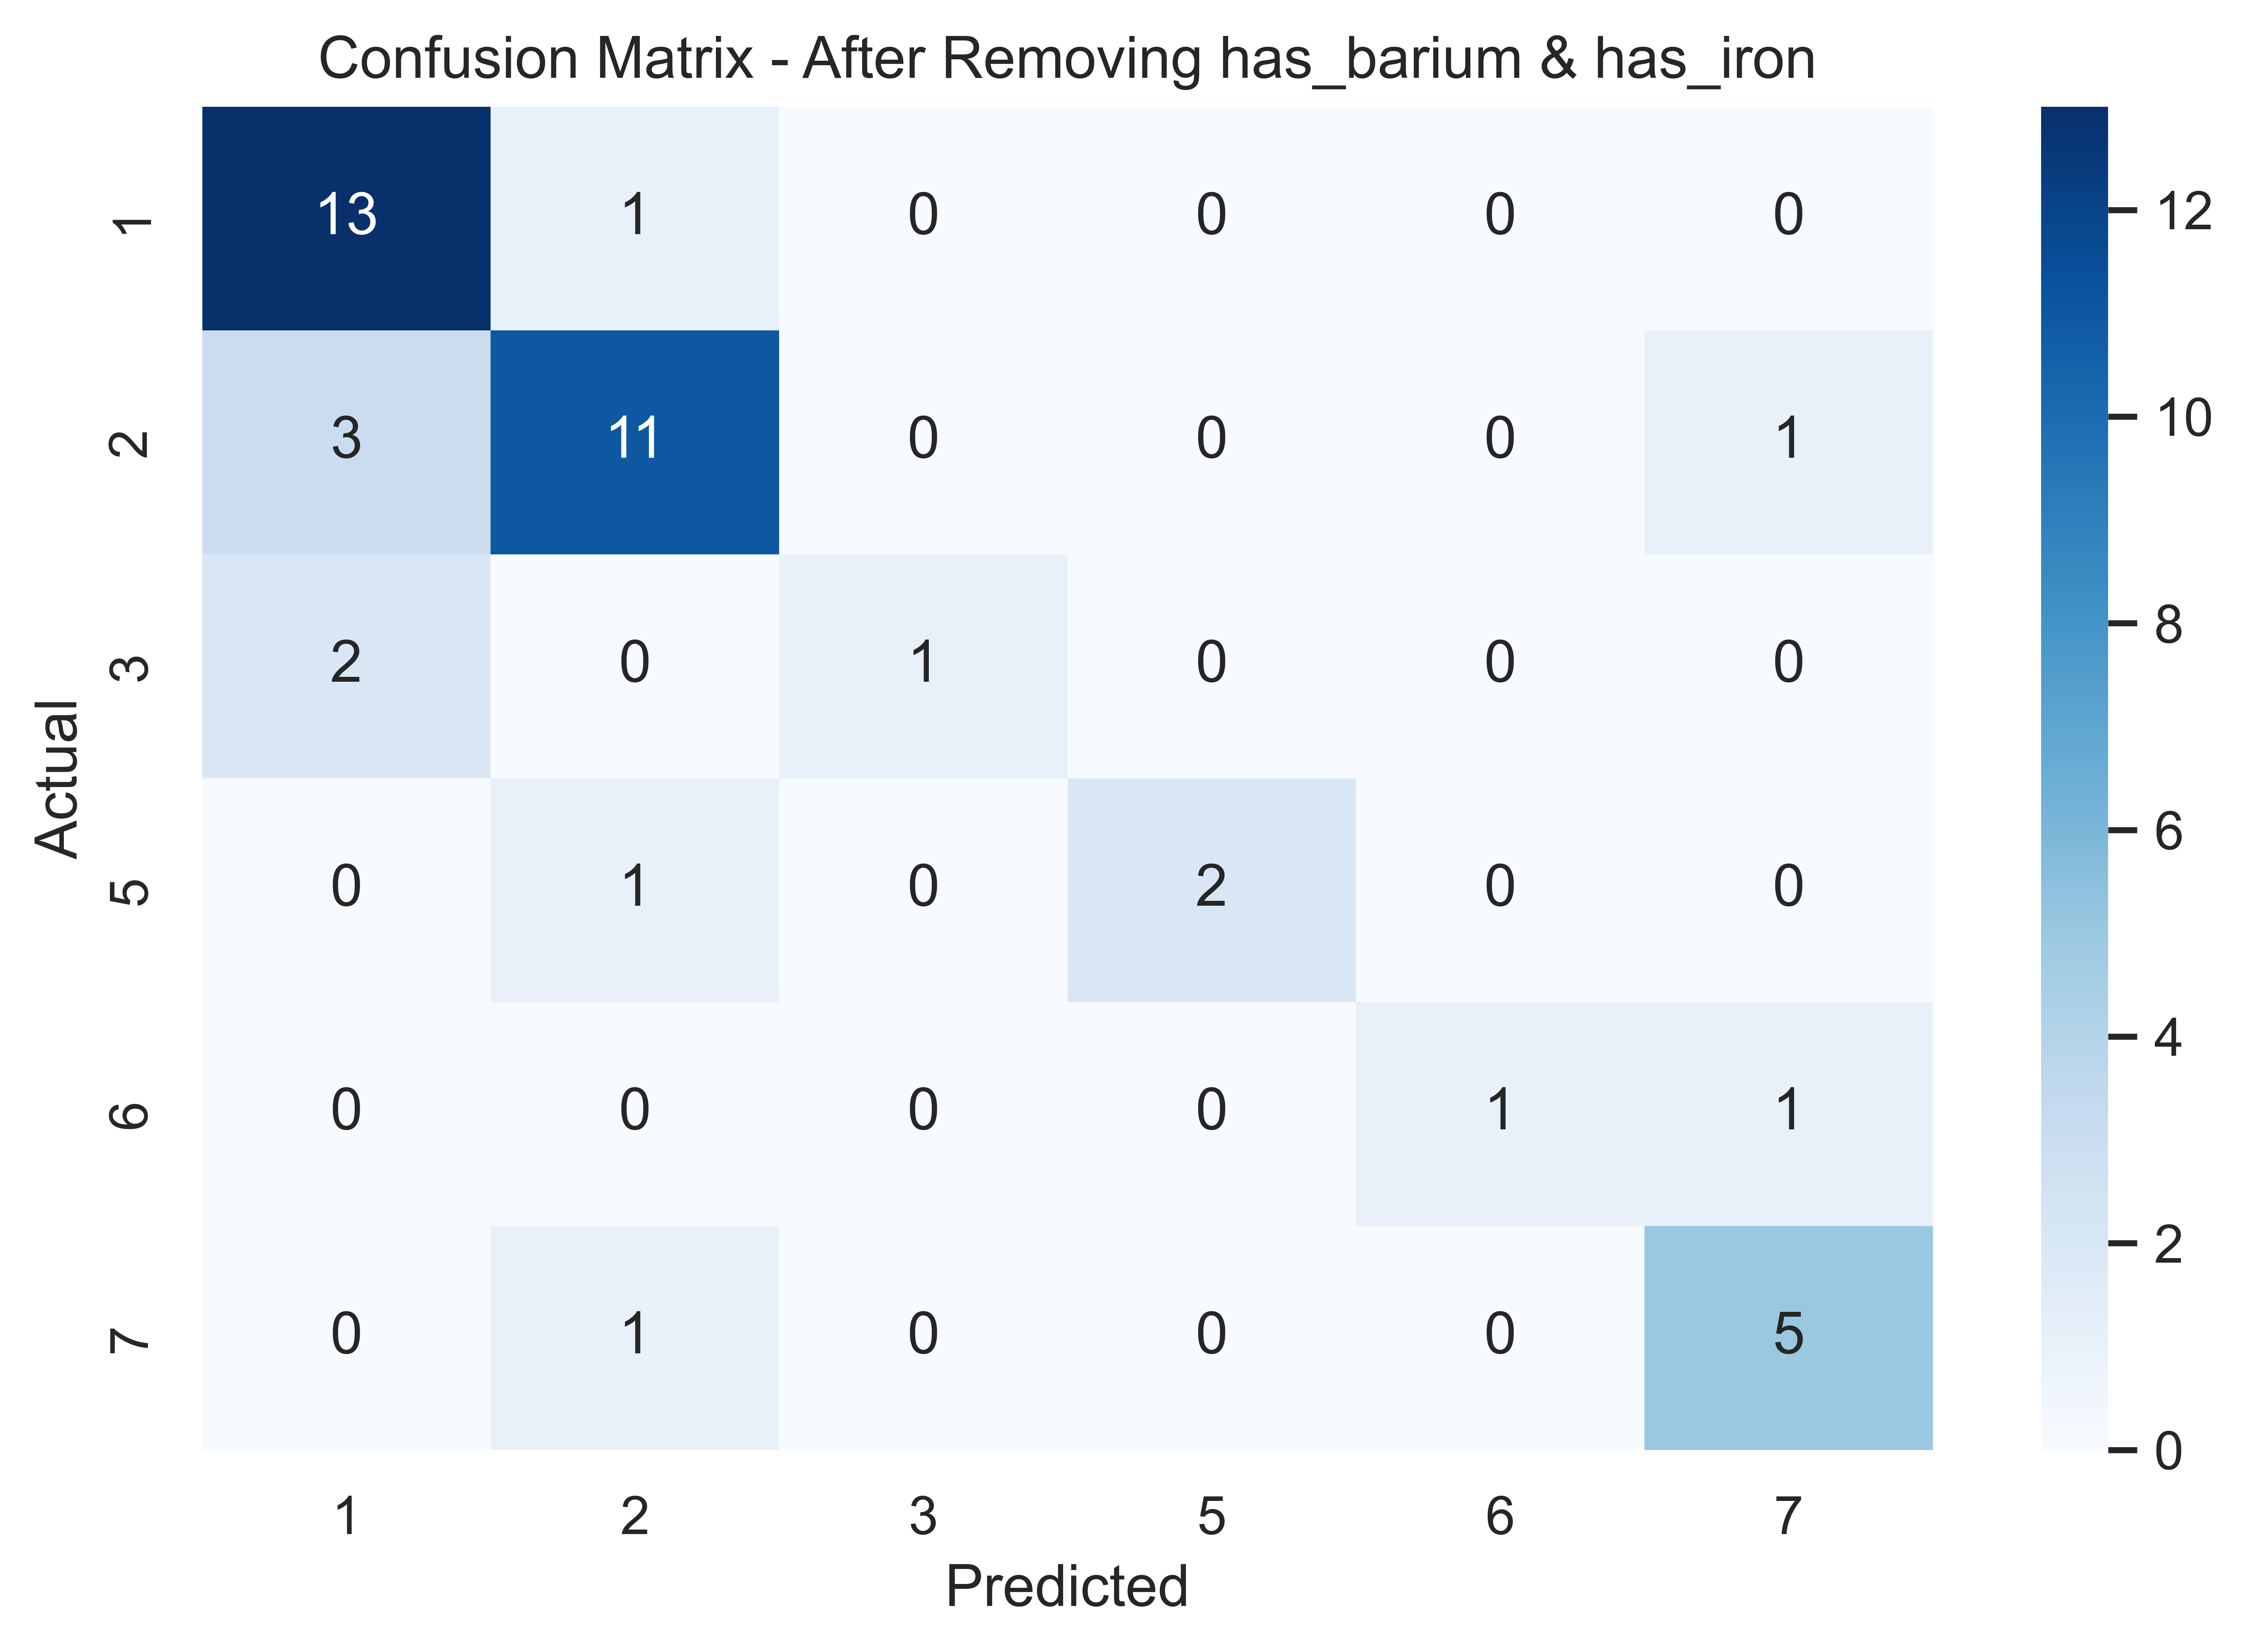

In [163]:
# Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, cmap='Blues', xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix - After Removing has_barium & has_iron")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Bagging

In [171]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [172]:
# Create base estimator
bag_base_tree = DecisionTreeClassifier(random_state=42)

In [173]:
# Bagging classifier
bag_model = BaggingClassifier(
    base_estimator=bag_base_tree,
    n_estimators=100,
    random_state=42,
    oob_score=True  # enables out-of-bag error estimation
)

In [175]:
# Train
bag_model.fit(X_train2, y_train2)
# Predict
bag_y_pred = bag_model.predict(X_test2)
bag_y_pred

array([7, 5, 2, 5, 1, 2, 2, 5, 1, 1, 3, 1, 7, 6, 3, 7, 7, 1, 2, 2, 1, 1,
       7, 2, 1, 3, 2, 2, 2, 1, 2, 3, 1, 7, 2, 2, 1, 1, 2, 3, 1, 2, 7],
      dtype=int64)

In [176]:
print('Training accuracy: ', bag_model.score(X_train2,y_train2))
print('Testing Accuracy: ', bag_model.score(X_test2,y_test2))

Training accuracy:  1.0
Testing Accuracy:  0.7441860465116279


In [178]:
# Evaluate
print("Bagging Accuracy:", accuracy_score(y_test2, bag_y_pred))
print("Out-of-Bag Score:", bag_model.oob_score_)
print("Classification Report:\n", classification_report(y_test2, bag_y_pred))

Bagging Accuracy: 0.7441860465116279
Out-of-Bag Score: 0.7426900584795322
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.71      0.67      0.69        15
           3       0.60      1.00      0.75         3
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         2
           7       0.71      0.83      0.77         6

    accuracy                           0.74        43
   macro avg       0.76      0.74      0.73        43
weighted avg       0.76      0.74      0.74        43



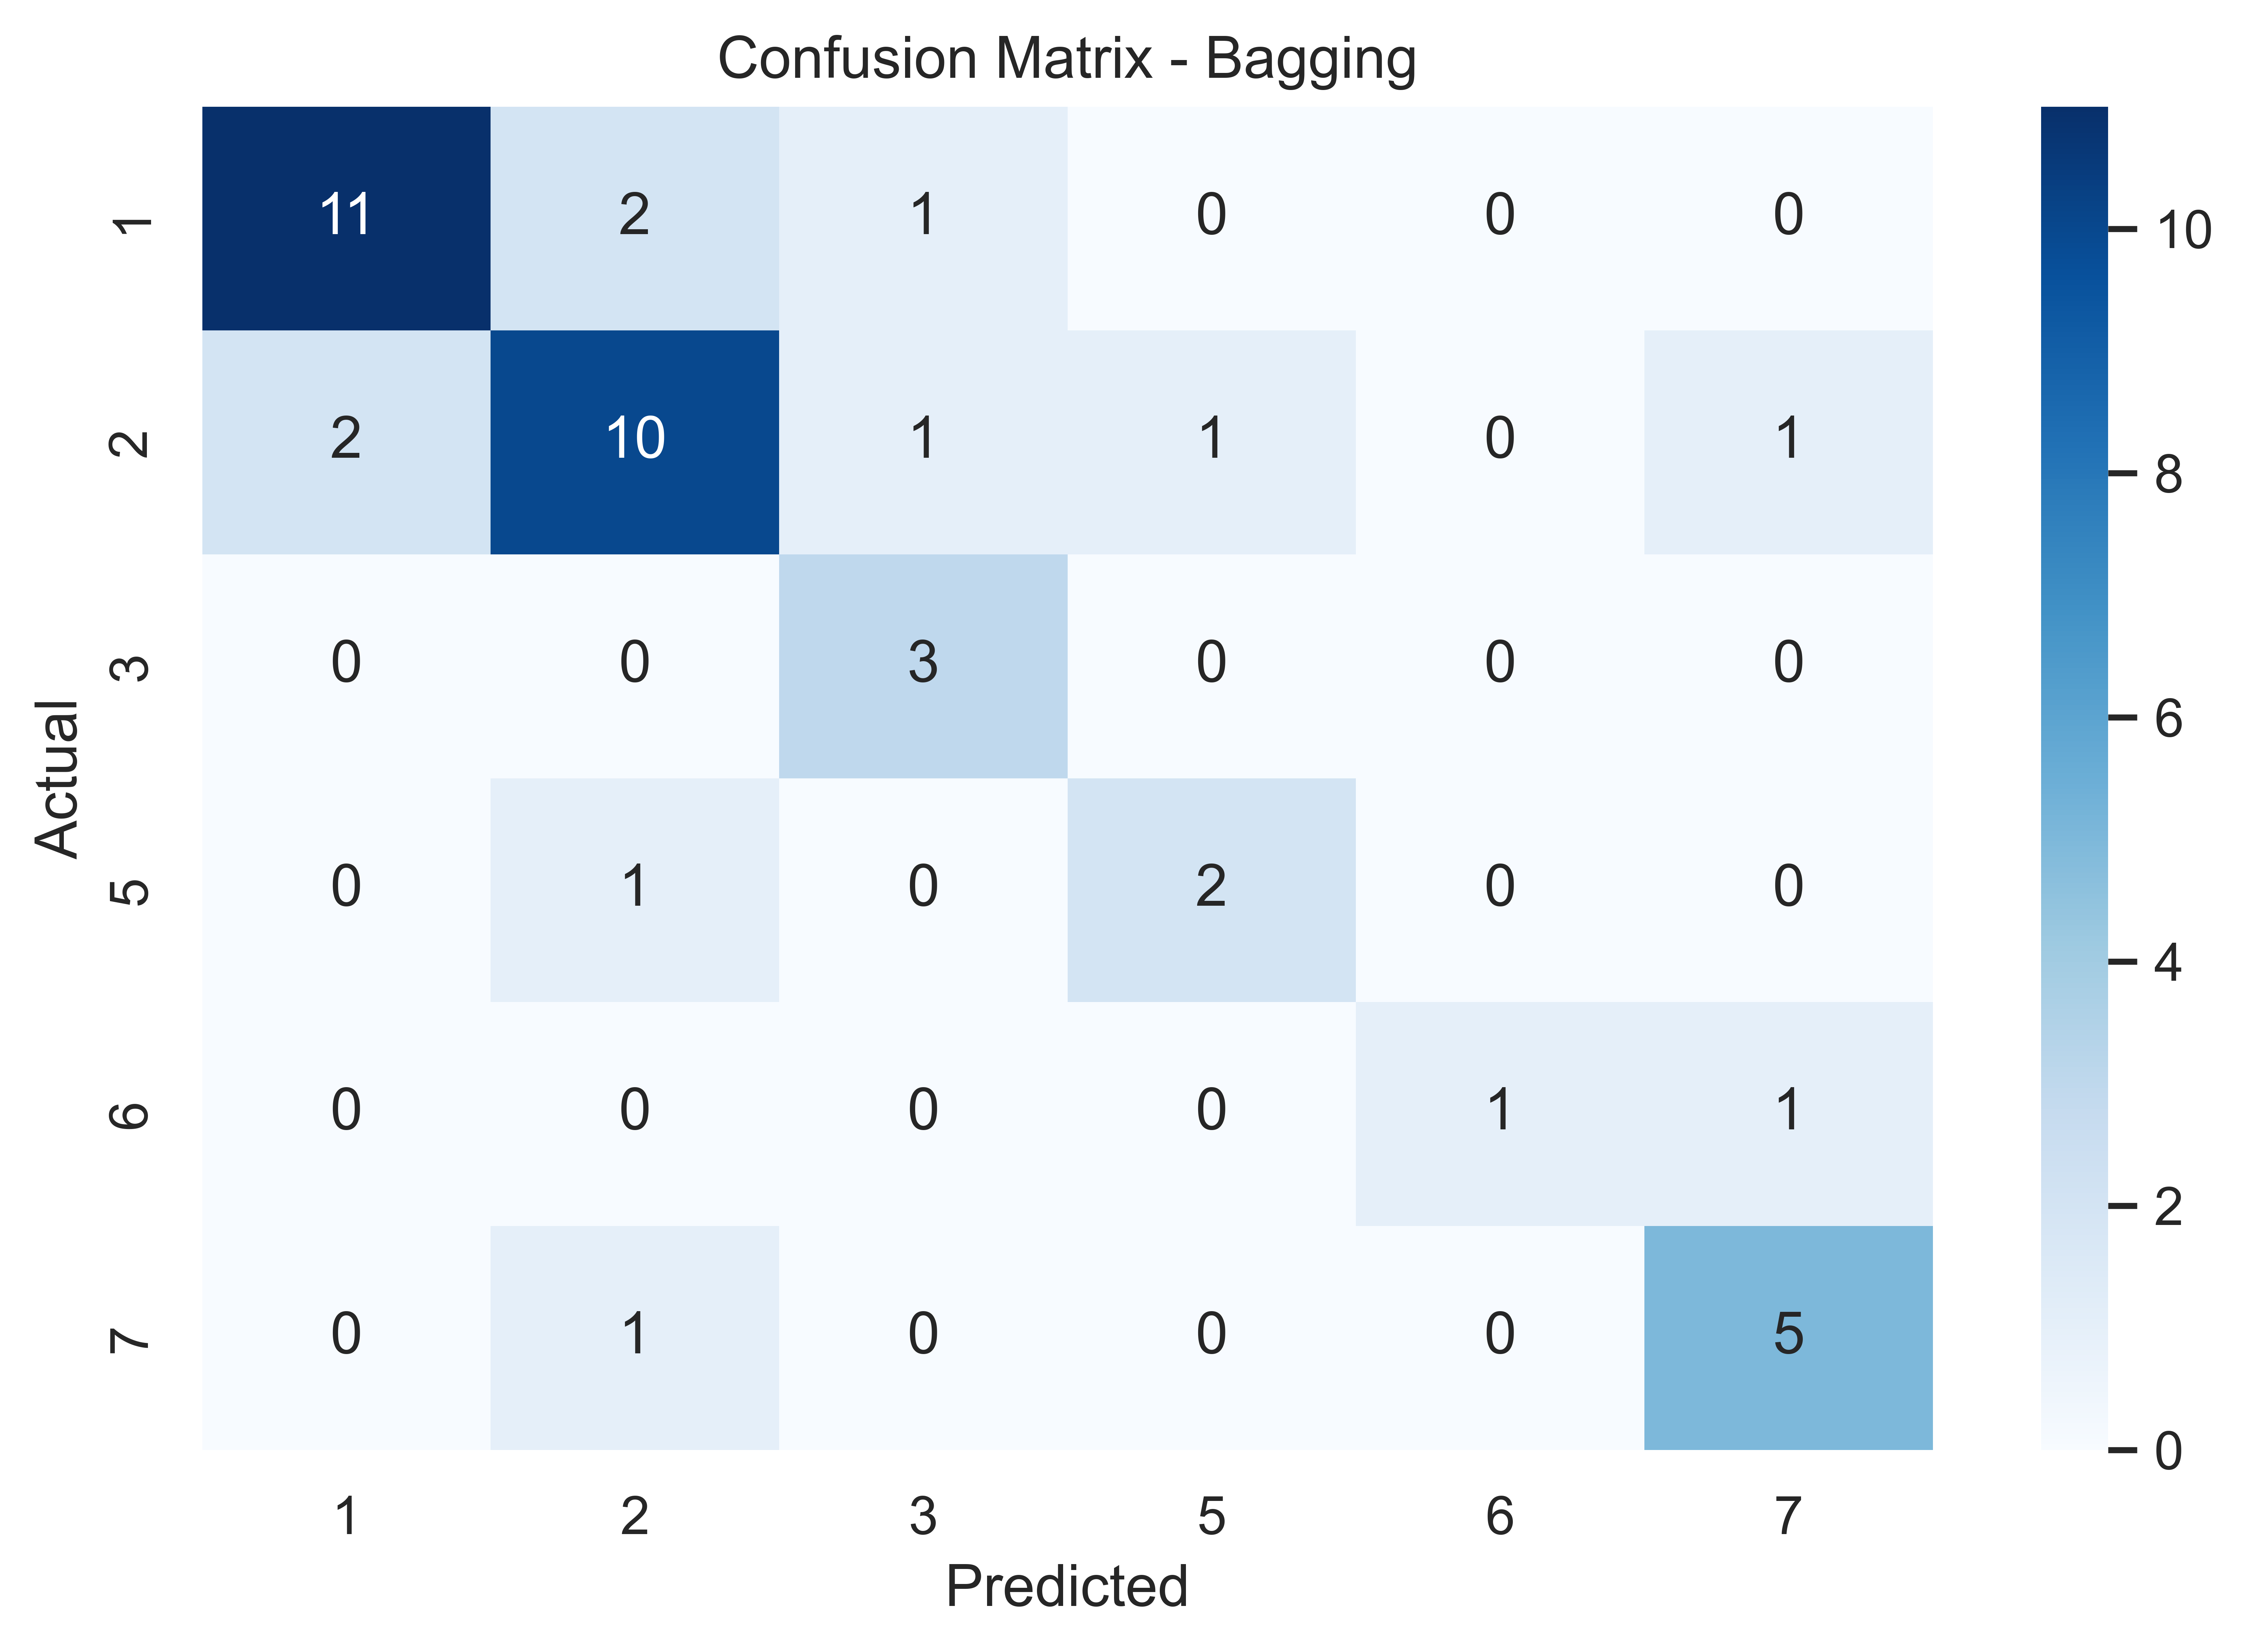

In [179]:
# Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test2, bag_y_pred), annot=True, cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix - Bagging")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Boosting

In [180]:
from sklearn.ensemble import AdaBoostClassifier

In [181]:
# AdaBoost with shallow trees
boost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.5,
    random_state=42)

In [182]:
# Train
boost_model.fit(X_train2, y_train2)
# Predict
boost_y_pred = boost_model.predict(X_test2)
boost_y_pred

array([7, 2, 2, 5, 1, 2, 2, 2, 1, 2, 1, 1, 7, 6, 2, 7, 6, 2, 2, 2, 2, 1,
       6, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 7, 2, 2, 1, 1, 3, 1, 2, 2, 6],
      dtype=int64)

In [183]:
# Evaluate
print("Boosting Accuracy (AdaBoost):", accuracy_score(y_test2, boost_y_pred))
print("Classification Report:\n", classification_report(y_test2, boost_y_pred))

Boosting Accuracy (AdaBoost): 0.5813953488372093
Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.57      0.59        14
           2       0.55      0.73      0.63        15
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       0.50      1.00      0.67         2
           7       0.75      0.50      0.60         6

    accuracy                           0.58        43
   macro avg       0.57      0.52      0.50        43
weighted avg       0.59      0.58      0.56        43



In [184]:
print('Training accuracy: ', boost_model.score(X_train2,y_train2))
print('Testing Accuracy: ', boost_model.score(X_test2,y_test2))

Training accuracy:  0.6608187134502924
Testing Accuracy:  0.5813953488372093


In [193]:
results = cross_val_score(boost_model, X, y, cv=10)

In [194]:
results

array([0.5       , 0.54545455, 0.72727273, 0.63636364, 0.71428571,
       0.66666667, 0.71428571, 0.42857143, 0.42857143, 0.38095238])

In [195]:
results.mean()

0.5742424242424242

In this assignment, I applied various ensemble learning techniques — Random Forest, Bagging, and Boosting. The initial analysis revealed that two features, barium and iron, contained over 80% and 67% zero values, respectively. These features were likely introducing noise and contributing little to predictive power.

After removing these sparse features and retraining the models, I observed an improvement in performance, particularly for Random Forest. Below is a models based on test accuracy:
1. Random Forest (tuned, with sparse features) - 72% 
2. **Random Forest (after feature removal)** - **77%**
3. Bagging - 74%
4. Boosting(AdaBoost) - 57%

The Random Forest model, with carefully tuned hyperparameters and removal of low-importance features, achieved the highest accuracy of 77%, indicating better generalization and robustness compared to Bagging and Boosting. This highlights the importance of feature selection and hyperparameter tuning in improving model performance.

### Aditional Notes:
#### 1. Explain Bagging and Boosting methods. How is it different from each other.
Ans.Bagging (Bootstrap Aggregating) is an ensemble method that trains multiple independent models (usually decision trees) on random subsets of the data (with replacement) and then combines their predictions (e.g., by voting). It helps reduce variance and prevent overfitting. 

Boosting is an ensemble technique that trains models sequentially, where each new model focuses on correcting the errors made by the previous ones. It aims to reduce bias and improve performance on difficult examples.

Difference:

Bagging builds models in parallel; Boosting builds them sequentially.

Bagging is used to reduce variance, while Boosting reduces bias.

Boosting is more prone to overfitting if not tuned carefully.
#### 2. Explain how to handle imbalance in the data.
Ans. To handle imbalanced data:

Use resampling techniques like SMOTE (Synthetic Minority Oversampling Technique) or undersampling the majority class.

Apply class weights in models to give more importance to minority classes.

Use evaluation metrics like F1-score, precision, recall, and confusion matrix instead of only accuracy.